In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
matches=pd.read_csv('ipl18_20.csv')
matches.info()
matches.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [3]:
matches[pd.isnull(matches['winner'])]
#find all NaN values in winner column, so that we update this as draw

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,21-05-2011,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,29-04-2015,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,17-05-2015,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,30-04-2019,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


In [4]:
matches['winner'].fillna('Draw', inplace=True)

In [5]:
matches.loc[241,'winner']

'Draw'

In [6]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','DCA'],inplace=True)


matches.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,NaN,MR Benson,SL Shastri


In [7]:
matches.loc[700,'team1']

'DCA'

In [8]:
df = pd.DataFrame(matches)
df["team1"].unique()

array(['RCB', 'KXIP', 'DD', 'MI', 'KKR', 'RR', 'DC', 'CSK', 'KTK', 'PW',
       'SRH', 'GL', 'RPS', 'DCA'], dtype=object)

In [9]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'DCA':14},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'DCA':14},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'DCA':14},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'DCA':14,'Draw':15}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,3,2,3,field,2,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,9,5,5,bat,5,runs,33.0,N,NaN,MR Benson,SL Shastri


In [10]:
df["team1"].unique()

array(['RCB', 'KXIP', 'DD', 'MI', 'KKR', 'RR', 'DC', 'CSK', 'KTK', 'PW',
       'SRH', 'GL', 'RPS', 'DCA'], dtype=object)

In [11]:
#Find cities which are null
matches[pd.isnull(matches['city'])]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
399,729281,NaN,17-04-2014,YS Chahal,Sharjah Cricket Stadium,1,7,3,3,field,3,wickets,8.0,N,NaN,Aleem Dar,S Ravi
402,729287,NaN,19-04-2014,PA Patel,Dubai International Cricket Stadium,1,3,1,3,field,3,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,NaN,19-04-2014,JP Duminy,Dubai International Cricket Stadium,1,2,7,2,bat,7,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,NaN,20-04-2014,GJ Maxwell,Sharjah Cricket Stadium,1,6,9,9,field,9,wickets,7.0,N,NaN,BF Bowden,M Erasmus
406,729295,NaN,22-04-2014,GJ Maxwell,Sharjah Cricket Stadium,1,9,10,10,field,9,runs,72.0,N,NaN,M Erasmus,S Ravi
407,729297,NaN,23-04-2014,RA Jadeja,Dubai International Cricket Stadium,1,6,5,6,field,5,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,NaN,24-04-2014,CA Lynn,Sharjah Cricket Stadium,1,3,2,3,field,2,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,NaN,25-04-2014,AJ Finch,Dubai International Cricket Stadium,1,10,7,10,bat,10,runs,4.0,N,NaN,M Erasmus,S Ravi
410,729303,NaN,25-04-2014,MM Sharma,Dubai International Cricket Stadium,1,5,1,1,bat,5,wickets,7.0,N,NaN,BF Bowden,M Erasmus
413,729309,NaN,27-04-2014,M Vijay,Sharjah Cricket Stadium,1,7,1,1,bat,7,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni


In [12]:
#remove any null values, winner has hence fill the null value in winner as draw
#City is also null, this is mainly for Dubai stadium. Hence update the City as Dubai
#Make sure to impute the data(cleansing and finding missing data), there is also other process 
#to verify expected value based on other resultants, for now by stadium, city is easily manually updated
matches['city'].fillna('Dubai',inplace=True)
matches.describe()
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             816 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    int64  
 7   team2            816 non-null    int64  
 8   toss_winner      816 non-null    int64  
 9   toss_decision    816 non-null    object 
 10  winner           816 non-null    int64  
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [13]:
#team_match_total=matches.groupby(["team1"]).size()+matches.groupby(["team2"]).size()
#print(team_match_total.get_value(1))
xx=matches.groupby(["toss_winner"]).size()
print(xx._get_value(1))
yy=matches.groupby(["winner"]).size()
print(yy._get_value(1))

106
120


In [14]:
#we maintain a dictionary for future reference mapping teams
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

1
MI


In [15]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,3,2,Bangalore,field,3,M Chinnaswamy Stadium,2
1,9,5,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5


In [16]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,816.000000,816.000000,816.000000,816.000000
mean,5.621324,5.656863,5.558824,5.474265
std,3.487751,3.476110,3.467850,3.517783
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.750000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,9.000000,9.000000,8.000000,9.000000
max,14.000000,14.000000,14.000000,15.000000


In [17]:
#31 cities
df["city"].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru', 'Sharjah'],
      dtype=object)

In [18]:
df["team1"].unique()

array([ 3,  9,  7,  1,  2,  6,  4,  5, 12, 13, 10,  8, 11, 14],
      dtype=int64)

In [19]:
#35 venues
df["venue"].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [20]:
cat_list=df["city"]
encoded_data, mapping_index = pd.Series(cat_list).factorize()
print(encoded_data)
print(mapping_index)
print(mapping_index.get_loc("Visakhapatnam"))

[ 0  1  2  3  4  5  6  7  6  1  0  7  3  1  0  4  2  6  5  7  6  1  3  5
  0  7  3  2  4  5  0  7  6  5  1  4  3  1  2  3  2  5  6  4  0  4  3  7
  1  2  7  0  4  5  6  3  3  3  8  8  8  8  9 10  8 10  8 10 10  9  8 10
  9 11 10 10 11 11 12 10  9 13  9 13 12 10 10 11 11 11 12 14 14  9 13 14
 11 11 10 10 10 15  9 13 13 15 11 13 10 10 11 11 11 13 13  3  3  1  4  7
 16  0  4  2  0  2 17 16  3 17  7  3  0  1  3 16  1  0 16  3  2  3  7  2
  4  1  7  3  4  2 18  7  5  4  0  1 18  0  2  5 18  3  7  5  7 19  0  4
 19  2  4  3  3  3  3  7  6 20  2  3  4  5  0  1  3  6  5  3  7  6  3  4
 20  2  3  4  1  3  4  2  6  5  7  2  3 20  2  5  0 20  4  5  7  3  2  6
  7  3 20  6  0  4  3  0  1  5  6  1  5  7 21  0  3 19 21  3 19  7  3  3
 19  2  0  4  3  3  7  7  7  4  3  5  0 22  5 23 22  0  2  3  7  1  4  2
 23  4  0  3  5  0  1  6  7  1  7  2  3 17  5 23  1 23  2  7  4  2  3  7
 17  5  0 23  7  4  1  3  0  2 23  6  3  5 23  4  7  5  1  0  4  2  3 19
  2  6 19 23  6  5 23  0  7  7  4  0  6  2  7 23  6

In [21]:
cat_list1=df["venue"]
encoded_data1, mapping_index1 = pd.Series(cat_list1).factorize()
print(encoded_data1)
print(mapping_index1)
print(mapping_index1.get_loc("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium"))

[ 0  1  2  3  4  5  6  7  6  1  0  7  8  1  0  4  2  6  5  7  6  1  8  5
  0  7  8  2  4  5  0  7  6  5  1  4  3  1  2  3  2  5  6  4  0  4  3  7
  1  2  7  0  4  5  6  3  3  8  9  9  9  9 10 11  9 11  9 11 11 10  9 11
 10 12 11 11 12 12 13 11 10 14 10 14 13 11 11 12 12 12 13 15 15 10 14 15
 12 12 11 11 11 16 10 14 14 16 12 14 11 11 12 12 12 14 14  8 17  1  4  7
 18  0  4  2  0  2 19 18 17 19  7 17  0  1 17 18  1  0 18  8  2 17  7  2
  4  1  7 17  4  2 20  7  5  4  0  1 20  0  2  5 20 17  7  5  7 21  0  4
 21  2  4  8  8  8  8  7  6 22  2  8  4  5  0  1  8  6  5  3  7  6  8  4
 22  2  3  4  1  3  4  2  6  5  7  2  8 22  2  5  0 22  4  5  7  3  2  6
  7  8 22  6  0  4  3  0  1  5  6  1  5  7 23  0  3 21 23  8 21  7  8  3
 21  2  0  4  3  3  7  7  7  4  3  5  0 24  5 25 24  0  2  3  7  1  4  2
 25  4  0  3  5  0  1  6  7  1  7  2  3 19  5 25  1 25  2  7  4  2  3  7
 19  5  0 25  7  4  1  3  0  2 25  6  3  5 25  4  7  5  1  0  4  2  3 21
  2  6 21 25  6  5 25  0  7  7  4  0  6  2  7 25  6

In [22]:
cat_list2=df["toss_decision"]
encoded_data2, mapping_index2 = pd.Series(cat_list2).factorize()
#print(encoded_data2)
print(mapping_index2)
print(mapping_index2.get_loc("field"))

Index(['field', 'bat'], dtype='object')
0


In [23]:
#Find some stats on the match winners and toss winners
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
#Mumbai won most toss and also most matches
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 106
KKR -> 98
CSK -> 97
RCB -> 87
RR -> 87
KXIP -> 85
DD -> 80
SRH -> 57
DC -> 43
PW -> 20
DCA -> 20
GL -> 15
RPS -> 13
KTK -> 8
No of match winners by each team
MI -> 120
CSK -> 106
KKR -> 99
RCB -> 91
KXIP -> 88
RR -> 81
DD -> 67
SRH -> 66
DC -> 29
DCA -> 19
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 4


<AxesSubplot:>

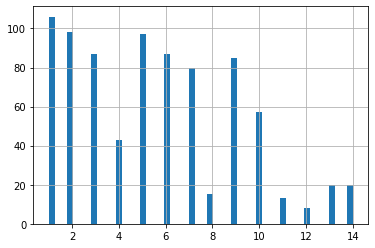

In [24]:
df['toss_winner'].hist(bins=50)

<AxesSubplot:>

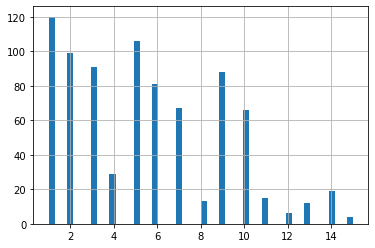

In [25]:
#shows that Mumbai won most matches followed by Chennai
df['winner'].hist(bins=50)

Text(0.5, 1.0, 'Match winners')

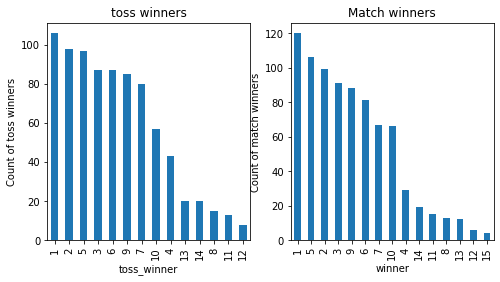

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Count of match winners')
ax2.set_title("Match winners")

In [27]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 
    #find the null values in every column

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [28]:
#Find cities which are null
df[pd.isnull(df['city'])]

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [29]:
#building predictive model , convert categorical to numerical data
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue','team1','team2']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df 

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,1,2,1,3,14,2
1,8,4,7,0,5,23,5
2,6,5,10,0,6,8,7
3,0,2,23,0,1,35,3
4,1,3,22,0,4,7,2
...,...,...,...,...,...,...,...
811,2,0,12,1,1,6,3
812,0,13,12,1,14,6,1
813,2,9,0,1,10,30,10
814,13,9,0,0,14,30,14


In [38]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
      model.fit(data[predictors],data[outcome])
      predictions = model.predict(data[predictors])
      print(predictions)
      accuracy = metrics.accuracy_score(predictions,data[outcome])
      print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

  

In [39]:
#Logestic Regression.
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model =LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)


[ 3 10  5  1  2  6  5  3  3  9  3  5  2 10  5  1  2  6  1  5  1  6  2  6
  3  3  2  3  1  1  3  9  1  9  5  5  1  9  2  1 10  1  1  2  3  2  1  5
  9  3  5  3  5  1  5  6  6  2  3  5  9  5  1  2  5  5  3  5  1  1  5  2
  1  6  1  5  6  6  2  5  1  2  1  1  5  9  5  1  3  6  2  2  5  1  1  5
  1  6  2  5  5  9  1  1  9  5  6  5  2  5  1  6  6  2  1  2  2  9  2  5
  9  5  2  3  3  5  3  6  2  5  9  2  3  9  2  5  5  3  6  2  5  2  5  5
  2  6  5  2  5  5  1  1  6  5  3  5  1  3 10  1  1  2  5  1  5  9  3  5
  9  5  1  2  5  2  1  5  3  5  5 10  2  6  3  9 10  1  1  6  5  6 10  2
 10  5  6  2  9  1  2  9  1  9  9  2 10 10  3  1  9 10  2  9  5  1  9  1
  5  2  7  3  3  2  1  5 10  1 10  9  1  5 10  3  1  9 10  7  5 10  7  1
  3 13  3  2  1  1  3  5  3  2  9  9  3  2  1 10  1  3  3  1  5  9  5  5
 10  2  5  1  6  5  6  5  9  9  5  9  6  2  1 10  6 10  2  5  1  5  1  5
 15  6  3 10  5 13 10  1  3  5  6  9  1  1  6  1  9 10  5  3  2  5  1  9
  3  5  9 10  1  1  1  3  3  5  2  3  9  5  5 10  5

C:\Users\hprak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hprak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
#Gaussian NAive bayes algorithm
from sklearn.naive_bayes import GaussianNB
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model = GaussianNB() 
classification_model(model, df,predictor_var,outcome_var)


[ 3  6  5  1  2  6  5  3 12 12 15  5 12  6  5  2 12 12  6  5  5  6 12  6
  3 12 12 12  2 12  3 12  1 12  5  2 12 12 12 12  5 12 12  2 15 12 12  5
 12 12  5  3  5 12  5 12  6 12  3  5  9  3  1 12  5  5  3  5  5  1  9 12
  1  6  2  7  6  6  2  5  6 12  1  1  5 12  5  1  6  6  2 12  5  1 12  5
  1  6 12  5  5  9  1 12 12  6  6  5 12  5  6  1  6 12 12 12  2 12 12  5
  6  5  2 12  3  5 12  6  2  5 12  2  3 12 12  5  5  3  6 12  5 12  5  5
  2  6  5  2  2  5  6  5  6  2  3  1  6  3  5 12 12  2  5  6  5 12  3  2
 12  5  2  2  5  2  2  5 12 10  5 13  2  6  3 12 13 12 12 12  5 12 12 12
 12  5 13 12 12 12 12 12 12 12 12 12 10 12 12 12 12 10 12 12  5 12 12 12
  5 12 12 12  3  2 12  9 10 12  5 12 12  5 12  3  1 12 12 12  7  5 12  1
 12 10  3 12 12 12  3  5  3 12 12 12 15 12 12 13  2  3 12 12  5 12  2  5
 10 12  5 12  6  9  6  5 12 12  5 12  1 12 12 13  5  1 12  5  2  5 12  5
  5  6  3  1  5  2  6 12  3  5 10 12 12 12 12  2 12 10  5  3 12  7 12 12
 12  6 12  1 12  6  1  3 12  5 12  3 12  5  3 13  4

C:\Users\hprak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
#applying knn algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
classification_model(model, df,predictor_var,outcome_var)

[ 3  5  7  1  2  6  7  1  6  9  6  5  1  9  3  1  3  9  1  7  2  1  1  6
  3  4  1  5  2  3  1  5  4  6  9  2  1  9  4  1  9  2  1  5  3  6  9  5
  9  1  5  3  2  6  3  6  1  5  4  3  7  4  5  1  4  7  3  3  4  5  9  3
  1  5  4  9  5  5  1  3  5  3  2  4  5  9  2  2  5  5  1  2  4  1  4  3
  3  1  3  3  3  7  1  4  3  7  2  3  2  5  1  3  2  4  4  1  1  9  2  5
  6  3  5  1  3  7  4  6  1  4  5  1  3  9  1  6  9  3  6  1  2  1  5  7
  2  2  5  1  9  7  4  1  6  2  3  9  4  3  9  6  4  1  5  6  7  4  1  2
  4  4  1  1  3  3  1  5  6  3  7 13  2  6  1  9 13  4  6  1  5  9  4  2
  3  4  1  2  9  5  3  9  1  6  5  3  1  3  2  6  3  7  2  6  5  1 10  1
  5  1  2  6  3  5  1  3  9  6  6  9  2  7  9  3  1  9  9  2  9  5  2  1
  9  7  3  1  1  1  1  5  1  2  1  6  3  1  6  9  1  3  7  1  5  9  2  4
  4  2  6  1  6  3  1  7  5  9  5  7  9  2  6  6  1  3  7  5  2  7  1  5
  4  6  3  2  5  2  9  1  3  2  6  7  1  5  1  1  7  6  9  1  5  7  1  9
  3  6  9  2  4  6  2  1  5  1  2  1 10  7  1  9 10

C:\Users\hprak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [42]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor)
# Create SVM classification object 
model = svm.SVC(kernel='rbf',gamma='auto') 
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
# there is various option associated with it, like changing kernel, gamma and C value. Will
classification_model(model, df,predictor_var,outcome_var)


C:\Users\hprak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 3  9  7  1  2  6  7  5  6  9  3  5  3  9  3  1  3  9  6  5  2  9  1  6
  3  5  1  7  2  6  1  5  2  6  9  2  1  9  7  1  7  6  1  2  3  2  1  5
  9  1  5  3  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  3  4  7  9  4
  1  6  3  9  5  5  1  3  6  5  9  3  5  6  7  3  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  3  1  1  9  2  5
  6  3  2  1  3  7  4  6  1  4  5  1  3  9  1  6  9  3  6  1  2  1  5  7
  2  9  5  1  2  2  6  5  6  2  3  9  4  3  7  6  4  1  5  6  5  5  1  2
  5  7  1  1  5  3  5  5  6  3  2 13  2  6  1  9 13  4  6  1  5  9  7  2
  3  7  1  2  9  1  2  7  1  6  5  3  5  3  2  6  3  7  2  6  5  1 12  1
  5  1 12  6  3  2  1  3  9  6 13  9  6  5  9  3  1  9 12  4  9  5  2  1
  9  7  3  1  5  1  3  5  5  2  1  6  3  5  6  9  1  3  7  1  5  9  2  7
  5  2  3  1  6  3  9  7  5  9  5  7  1  2  6  7  9  5  7  5  2  7  1  5
  4  6  3  2  5  2  9  1  3  2  6  9  1  6  3  1  5  6  9  1  2  7  1  9
  2  6  9  2  4  6  2  5  5  1  2  1 10  7  5  9 10

In [43]:
#Decision tree algorithm
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=10, min_samples_leaf=2)
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)


[ 3  5  7  3  2  6  7  1  6  9  6  5  4  9  3  1  3  9  6  5  4  2  1  6
  3  4  1  7  2  5  1  5  2  6  9  2  1  6  7  1  7  3  1  5  3  2  9  5
  9  1  5  3  2  6  4  7  5  5  1  3  7  4  5  2  4  5  6  3  4  3  6  4
  1  7  2  9  4  5  1  3  6  5  2  1  5  6  7  4  6  5  7  9  5  1  7  6
  3  1  7  3  6  7  1  4  9  7  2  3  2  5  1  4  7  3  4  2  1  9  2  4
  9  3  2  1  3  7  4  6  3  4  5  1  3  6  1  6  2  3  6  1  2  1  5  7
  2  9  5  1  2  3  6  1  6  2  3  1  4  3  7  6  4  1  5  3  5  9  1  2
  5  7  1  1  5  3  5  2  6 13  1 13  2  6  1  5 13  4  2  1  5  9 13  2
 13  7  1  2  6  5  3  7  1  6  5  3 13 13  2  6  3 13  2  6  5  1 10  2
  5  1  2  7  3  2  1  3  9  5  9  9  3  5 13  3  4  9 13 13  9  5  2  6
  9 10  3  1  5  1  3  5  1  2 13  6  3  4  2 13  1  3  7  1  5  9  2  7
 13  2  6  1  6  3  2  7  5  9  5 10  9  2  6 13  1 13  7  5  2  7  1  2
  4  6  3  1  5  2  6  1  3  2 13  9  1  5 13  1  5  6  9  1  5  7  1  5
  3  6  9  2  4  6  2  5  7  2  2  1 10  7  1 13 10

In [44]:
#Random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state =15)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\hprak\AppData\Local\Temp\ipykernel_12252\142699204.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(data[predictors],data[outcome])


[ 3  5  7  1  2  6  7  5  6  9  6  5  4  9  5  1  3  9  6  7  3  2  1  6
  3  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  3  1  5  3  6  9  5
  9  1  5  3  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  3  4  7  9  4
  1  6  3  9  7  5  1  3  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  6  3  2  1  3  5  4  6  3  4  9  1  3  6  1  6  2  3  6  1  2  1  5  7
  2  3  5  1  9  7  6  1  6  2  3  1  4  3  9  6  4  1  5  6  7  4  1  2
  5  4  1  1  5  3  5  5  6  3  1 13  2  6  1  9 13  4  2 12  5  9  7  2
 12  4  1 12  9  5  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  3  2  1  3 13  6 13  9  3  7  9  3  4  9 12  4  9  5  2  6
  4 15  3  1  5  1  3  5  5  2 13  6  3  5  2  9  1  3  7  1  5  9  2  4
  5  2  6  1  6  3  2  7  5  9  5 13  1  2  6  7  1  4  7  9  2  7  1  5
  4  7  3  1  5  2  6  1  3  2  6  9  1  5  3  1  5  6  9  1  5  7  1  9
  3  4  9  2  4  6  2  5  5  2  2  1 10  7  1  9 10